# CALIFORNIA HOUSES PRICE PREDICTION USING KERAS

**This notebook was run on Google colaboratory and the data was taken from the sample_data folder.**

## Importing Data

In [1]:
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_train = pd.read_csv('/content/sample_data/california_housing_train.csv')
df_test = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [3]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [4]:
df_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


## Plots

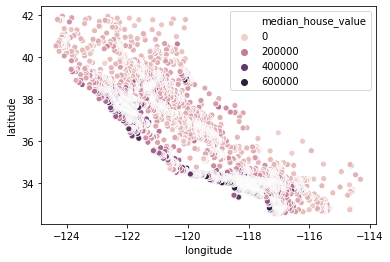

In [5]:
sns.scatterplot(x='longitude', y='latitude', data=df_train, hue='median_house_value')

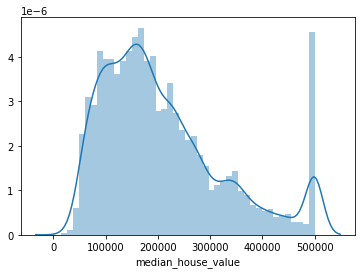

In [6]:
sns.distplot(df_train.median_house_value)

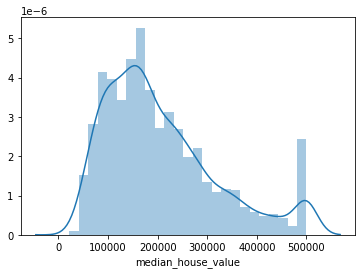

In [7]:
sns.distplot(df_test.median_house_value)

## Preprocessing

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
train_features, train_labels = df_train.drop('median_house_value', axis=1), df_train['median_house_value']
test_features, test_labels = df_test.drop('median_house_value', axis=1), df_test['median_house_value']

In [10]:
scaler = MinMaxScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

## Defining and Training the Keras Model

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error

In [12]:
model = Sequential()

model.add(Dense(8, activation='relu', input_dim=train_features.shape[1]))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1))


In [13]:
model.compile(loss='mean_absolute_error', optimizer='adam')

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(x=train_features, y=train_labels, batch_size=128, epochs=500, verbose=1)

Epoch 1/500
133/133 [==============================] - 0s 1ms/step - loss: 207300.3438
Epoch 2/500
133/133 [==============================] - 0s 999us/step - loss: 207295.3281
Epoch 3/500
133/133 [==============================] - 0s 1ms/step - loss: 207275.6250
Epoch 4/500
133/133 [==============================] - 0s 956us/step - loss: 207219.2656
Epoch 5/500
133/133 [==============================] - 0s 989us/step - loss: 207092.2031
Epoch 6/500
133/133 [==============================] - 0s 1ms/step - loss: 206856.1250
Epoch 7/500
133/133 [==============================] - 0s 976us/step - loss: 206467.5312
Epoch 8/500
133/133 [==============================] - 0s 1ms/step - loss: 205880.3906
Epoch 9/500
133/133 [==============================] - 0s 959us/step - loss: 205047.1562
Epoch 10/500
133/133 [==============================] - 0s 1ms/step - loss: 203918.6250
Epoch 11/500
133/133 [==============================] - 0s 958us/step - loss: 202445.6562
Epoch 12/500
133/133 [=======

## Making Predictions

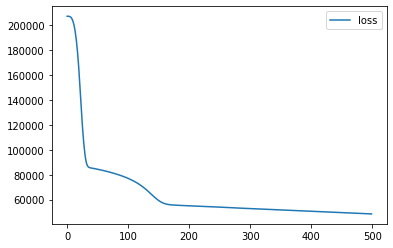

In [16]:
pd.DataFrame(model.history.history).plot()

In [17]:
pred_labels = model.predict(test_features)
mean_absolute_error(test_labels, pred_labels)

48181.05952473958

In [18]:
df_labels = pd.DataFrame()
df_labels['true'] = test_labels
df_labels['pred'] = pred_labels
df_labels.sort_values(by='pred', inplace=True)

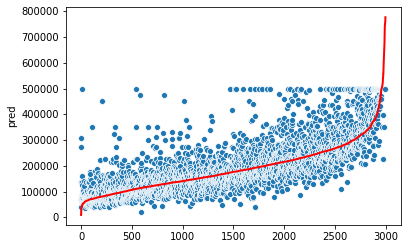

In [19]:
sns.scatterplot(x=range(len(df_labels)), y='true', data=df_labels)
sns.lineplot(x=range(len(df_labels)), y='pred', data=df_labels, color='red', linewidth=2)